# Functions for better analysis

In [1]:
import sys                             # system module 
import numpy as np                     # number package
import pandas as pd                    # data package
from matplotlib import pyplot as plt   # graphics package
import datetime as dt                  # date and time module

# check versions (overkill, but why not?)
print(f'Python version: {sys.version}')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
# print(f'Matplotlib version: {plt.__version__}'
print(f'Today: {dt.date.today()}' )

Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy version: 1.16.5
Pandas version: 0.25.1
Today: 2020-09-27


In [3]:
data_file = pd.read_csv('Covid_data.csv')

Enter country: Pakistan


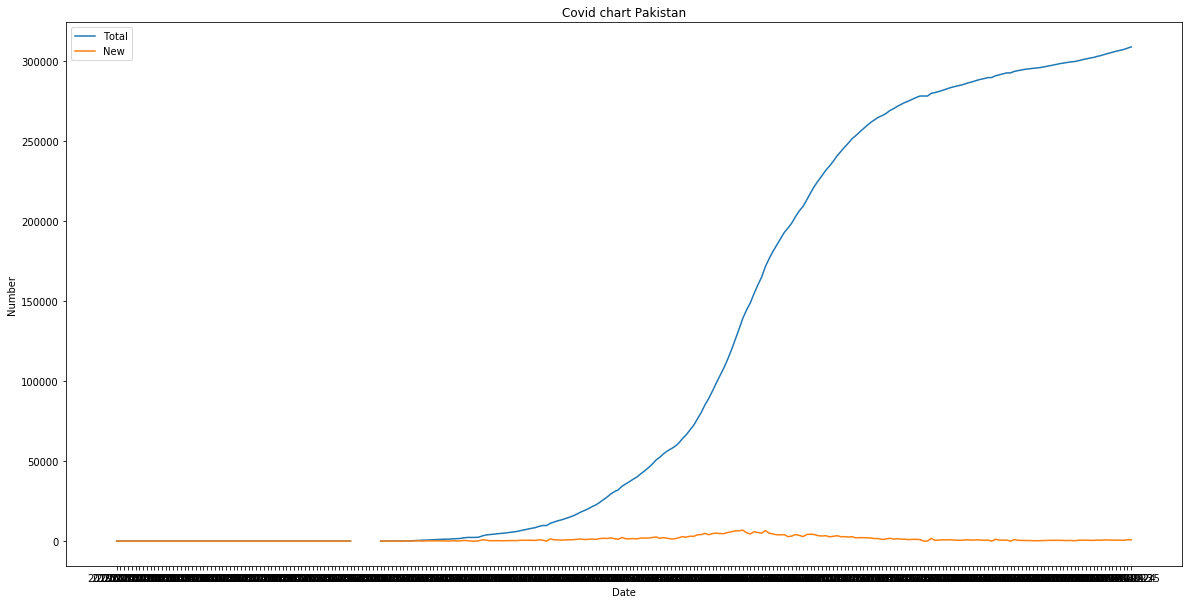

In [18]:
# Plot Total and new cases for a Country

def plotcoutry(name):    
    c_name = data_file[data_file.location == name]
    
    plt.figure(figsize=(20,10))
    # Getting the data to plot
    
    plt.plot(c_name.date,c_name.total_cases)
    plt.plot(c_name.date,c_name.new_cases)
    
    # labelling
    plt.title(f"Covid chart {name}")
    plt.xlabel("Date")
    plt.ylabel("Number")
    plt.legend(['Total','New'])
    # Display
    plt.show()

if __name__ == '__main__':
    name = input('Enter country: ')
    plotcoutry(name)


Enter first country: Japan
Enter second country: South Korea
Total cases(T) or New Cases(N): N


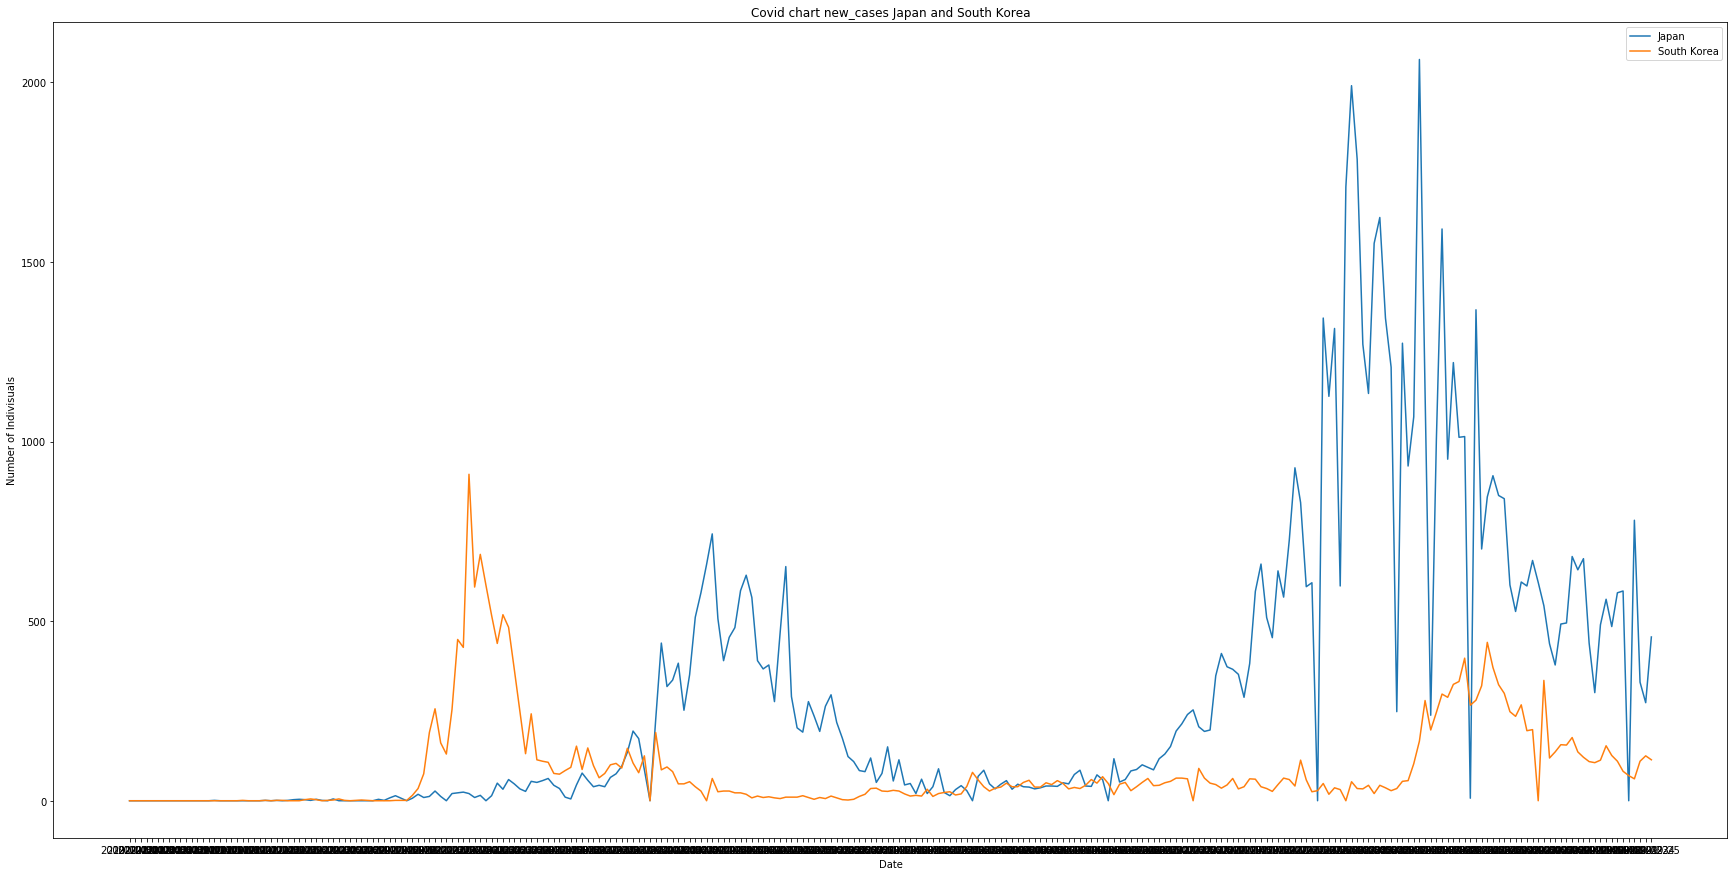

Date = 2020-09-25
Japan New = 456  Total = 456
South Korea New = 114  Total = 114


In [35]:
# Compare Total cases of Two countries

def total_compare(name1,name2,req_data):    
    a_name = data_file[data_file.location == name1]
    b_name = data_file[data_file.location == name2]
    
    plt.figure(figsize=(30,15))
    # Getting the data to plot
    
    if req_data == 'total_cases':
        plt.plot(a_name.date,a_name.total_cases)
        plt.plot(b_name.date,b_name.total_cases)
    else:
        plt.plot(a_name.date,a_name.new_cases)
        plt.plot(b_name.date,b_name.new_cases)
    
    
    # labelling
    plt.title(f"Covid chart {req_data} {name1} and {name2}")
    plt.xlabel("Date")
    plt.ylabel("Number of Indivisuals")
    plt.legend([name1,name2])
    # Display
    plt.show()
    
    print(f'Date = {a_name.date.iloc[-1]}')
    
    print(f'{name1} New = {int(a_name.new_cases.iloc[-1])}  Total = {int(a_name.new_cases.iloc[-1])}')
    
    
    print(f'{name2} New = {int(b_name.new_cases.iloc[-1])}  Total = {int(b_name.new_cases.iloc[-1])}')
    
if __name__ == '__main__':    
    name1 = input('Enter first country: ')
    name2 = input('Enter second country: ')

    req_data = input('Total cases(T) or New Cases(N): ')

    if req_data.lower() == 't':
        req_data = 'total_cases'
        total_compare(name1,name2,req_data)
    else:
        req_data = 'new_cases'
        total_compare(name1,name2,req_data)